In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector, TransformedTargetRegressor
from sklearn.metrics import mean_squared_error


### Load Data

In [2]:
train = pd.read_csv('datasets/train_cleaned.csv', index_col='Id', na_filter=False)

In [3]:
X = train.drop(columns = 'SalePrice')
y = train['SalePrice']

In [4]:
X_test = pd.read_csv('datasets/test_cleaned.csv', index_col = 'Id', na_filter=False)
X_test.head()

,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,is Shed,is PUD,Cond Feeder,Cond Artery,Cond Pos,Cond RR,Porch SF,MoYr Sold,is Remodeled,Last Remodel
Id,,,,,,,,,,,,,,,,,,,,,
2658,RM,69.0000,9142,1,Grvl,0,Lvl,AllPub,Inside,0,...,0,0,0,0,0,0,172,2006.333333,1,56
2718,RL,69.0552,9662,1,None,1,Lvl,AllPub,Inside,0,...,0,0,0,0,0,0,170,2006.666667,0,29
2414,RL,58.0000,17104,1,None,1,Lvl,AllPub,Inside,0,...,0,0,0,0,0,0,124,2006.750000,0,0
1989,RM,60.0000,8520,1,None,0,Lvl,AllPub,Inside,0,...,0,0,0,0,0,0,184,2007.583333,1,1
625,RL,69.0552,9500,1,None,1,Lvl,AllPub,Inside,0,...,0,0,0,0,0,0,261,2009.583333,0,46


In [5]:
X.isna().any().any()

False

In [6]:
X_test.isna().any().any()

False

In [7]:
X.head()

,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Garage Ratio,is Shed,is PUD,Cond Feeder,Cond Artery,Cond Pos,Cond RR,Porch SF,is Remodeled,Last Remodel
Id,,,,,,,,,,,,,,,,,,,,,
109,RL,69.0552,13517,1,None,1,Lvl,AllPub,CulDSac,0,...,237.5,0,0,0,0,0,1,44,1,5
544,RL,43.0000,11492,1,None,1,Lvl,AllPub,CulDSac,0,...,279.5,0,0,0,0,0,0,74,1,12
153,RL,68.0000,7922,1,None,0,Lvl,AllPub,Inside,0,...,246.0,0,0,0,0,0,0,52,1,3
318,RL,73.0000,9802,1,None,0,Lvl,AllPub,Inside,0,...,200.0,0,0,0,0,0,0,100,1,3
255,RL,82.0000,14235,1,None,1,Lvl,AllPub,Inside,0,...,242.0,0,0,0,0,0,0,59,1,17


In [8]:
X.dtypes

MS Zoning        object
Lot Frontage    float64
Lot Area          int64
Street            int64
Alley            object
                 ...   
Cond Pos          int64
Cond RR           int64
Porch SF          int64
is Remodeled      int64
Last Remodel      int64
Length: 64, dtype: object

In [9]:
X['Alley'].value_counts()

None    1911
Grvl      85
Pave      55
Name: Alley, dtype: int64

### Helper Functions

#### Fit model, score on train, predict, and save outputs

In [10]:
def run_model(model, out, X = X, X_test = X_test):
    model.fit(X, y)
    print(model.score(X, y))
    preds = model.predict(X_test)
    out_df = pd.DataFrame(preds, columns = ['SalePrice'], index = X_test.index)
    out_df.to_csv('submission/' + out + '.csv')

### Linear Regression model

In [11]:
encoder = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_include=object)),
    (OneHotEncoder(), ['Mo Sold', 'Yr Sold', 'MoYr Sold']),
    (StandardScaler(), make_column_selector(dtype_include = [int, float])),
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [115]:
# pd.DataFrame(encoder.fit_transform(X[['Alley']])).sum()

In [11]:
pipe = make_pipeline(
    encoder,
    LinearRegression()
)

In [12]:
pipe.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder-1',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002552E37D250>),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(),
                                                  ['Mo Sold', 'Yr Sold',
                                                   'MoYr Sold']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002552E37D970>)],
                                   verbose_feature_

In [13]:
pipe.score(X, y)

0.9049148098460276

In [14]:
pipe.named_steps['linearregression'].coef_

array([ 5.88563600e+03, -1.37620419e+03, -2.28987594e+03, -2.21955587e+03,
        8.24888585e+02,  8.10938556e+02, -1.63582714e+03, -1.01244490e+04,
        1.05922503e+04,  4.69421678e+02, -9.37223012e+02,  6.01171461e+03,
       -4.18783681e+04,  3.58666535e+04,  2.73572622e+03,  6.84110085e+03,
       -1.47478516e+03, -1.06280184e+04,  2.52597646e+03,  3.87895810e+03,
        8.70658021e+03, -1.06656697e+04, -7.40159588e+03, -9.88867288e+03,
        5.17932073e+03, -2.25313250e+04, -1.32843698e+04, -1.67009021e+04,
        3.81360198e+03, -1.08467086e+04, -1.18610808e+04,  1.39978464e+04,
       -1.61396252e+04,  2.65798653e+04,  3.71799836e+04, -1.87490483e+04,
       -1.77647292e+04, -1.19209809e+04, -1.14892743e+04,  6.99962499e+03,
        4.77778437e+04, -6.43447671e+03,  6.72674537e+03,  2.48380890e+04,
        5.80391687e+03, -4.56290249e+01, -5.50021483e+03, -6.21545512e+03,
        5.95738210e+03,  3.53780200e+03,  2.91844699e+03,  1.03211141e+04,
       -1.59862091e+04,  

In [15]:
X_test['SalePrice'] = pipe.predict(X_test)

In [16]:
X_test[['SalePrice']].to_csv('submission/LinearRegression.csv') 

Overfitting by about 2000

In [17]:
# Kaggle RMSE 26406
mean_squared_error(y, pipe.predict(X), squared=False)

24434.151484870603

### Log Transformation

In [18]:
log_lr_model = TransformedTargetRegressor(regressor = pipe, func = np.log, inverse_func = np.exp)

In [19]:
run_model(log_lr_model, out = 'lr_logTransform') 

0.9046113036154945


*Under*-fitting by about 700.

In [20]:
mean_squared_error(y, log_lr_model.predict(X), squared = False)
# Kaggle score 23733

24473.116589932702

### Ridge Regression

In [19]:
pipe_ridge = make_pipeline(
    encoder,
    Ridge()
)

In [20]:
params_ridge = {'ridge__alpha': np.logspace(-4, 4)}

In [21]:
gs_ridge = GridSearchCV(pipe_ridge, params_ridge)

In [22]:
# gs_ridge.fit(X, y)

In [23]:
run_model(gs_ridge, 'ridge')

0.9009375573453472


In [24]:
pd.DataFrame(gs_ridge.cv_results_).query('rank_test_score < 10')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
27,0.067631,0.007110,0.019809,0.003664,2.559548,{'ridge__alpha': 2.559547922699533},0.857799,0.889847,0.801152,0.886394,0.825558,0.852150,0.034449,8
28,0.057806,0.005189,0.017203,0.002715,3.727594,{'ridge__alpha': 3.727593720314938},0.858362,0.890913,0.800064,0.888794,0.825344,0.852695,0.035536,7
29,0.060809,0.006241,0.015793,0.001715,5.428675,{'ridge__alpha': 5.428675439323859},0.859272,0.892855,0.800483,0.890496,0.825061,0.853633,0.036250,5
30,0.055408,0.005464,0.017196,0.002047,7.906043,{'ridge__alpha': 7.9060432109076855},0.859769,0.894095,0.798900,0.892218,0.824922,0.853981,0.037371,3
31,0.062108,0.009068,0.017868,0.001914,11.513954,{'ridge__alpha': 11.513953993264458},0.860179,0.895294,0.796718,0.894202,0.825329,0.854344,0.038632,1
32,0.054380,0.002135,0.016198,0.002038,16.768329,{'ridge__alpha': 16.768329368110066},0.859984,0.896103,0.795603,0.895506,0.824040,0.854247,0.039595,2
33,0.052201,0.004008,0.014606,0.001213,24.420531,{'ridge__alpha': 24.420530945486497},0.859660,0.896943,0.793846,0.896817,0.821630,0.853779,0.040928,4
34,0.054004,0.003635,0.017600,0.002332,35.564803,{'ridge__alpha': 35.564803062231285},0.858690,0.897146,0.792361,0.897264,0.820345,0.853161,0.041675,6
35,0.052403,0.001490,0.014794,0.001167,51.794747,{'ridge__alpha': 51.79474679231202},0.857482,0.896391,0.790058,0.897252,0.817580,0.851752,0.042590,9


In [25]:
# gs_ridge.best_estimator_

Overfitting about 300

In [26]:
# Kaggle score 25364
mean_squared_error(y, gs_ridge.predict(X), squared=False)

24939.936227172922

#### Ridge w/ log transform

In [27]:
log_ridge = TransformedTargetRegressor(regressor=gs_ridge, func=np.log, inverse_func=np.exp)

In [28]:
run_model(log_ridge, 'ridge_logT')

0.8865224435070076


In [29]:
log_ridge.regressor_.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder-1',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000024AF2759160>),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(),
                                                  ['Mo Sold', 'Yr Sold',
                                                   'MoYr Sold']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000024AF2759D90>)],
                                   verbose_feature_

In [30]:
mean_squared_error(y, log_ridge.predict(X), squared = False)

26692.903116970483

### Feature squares

In [31]:
X_num_cols = [c for c in X.columns if X.dtypes[c] != object and X[c].max() > 1]

In [32]:
len(X_num_cols)

34

In [33]:
X_squared = X[X_num_cols]**2
X_test_squared = X_test[X_num_cols]**2

In [34]:
X_all = X.join(X_squared, rsuffix = '**2')
X_test_all = X_test.join(X_test_squared, rsuffix = '**2')

In [35]:
X_test_all.head()

,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Fence**2,Misc Val**2,Mo Sold**2,Yr Sold**2,MoYr Sold**2,Lot Ratio**2,Sum Bath**2,Garage Ratio**2,Porch SF**2,Last Remodel**2
Id,,,,,,,,,,,,,,,,,,,,,
2658,RM,69.0000,9142,1,Grvl,0,Lvl,AllPub,Inside,0,...,0,0,16,4024036,4.025373e+06,3.687110,4.00,193600.0,29584,3136
2718,RL,69.0552,9662,1,None,1,Lvl,AllPub,Inside,0,...,0,0,64,4024036,4.026711e+06,5.331275,4.00,84100.0,28900,841
2414,RL,58.0000,17104,1,None,1,Lvl,AllPub,Inside,0,...,0,0,81,4024036,4.027046e+06,25.851360,12.25,45369.0,15376,0
1989,RM,60.0000,8520,1,None,0,Lvl,AllPub,Inside,0,...,0,0,49,4028049,4.030391e+06,5.601111,1.00,57600.0,33856,1
625,RL,69.0552,9500,1,None,1,Lvl,AllPub,Inside,0,...,0,0,49,4036081,4.038425e+06,5.331275,6.25,66049.0,68121,2116


In [36]:
pipe_squares_ridge = make_pipeline(
    encoder,
    Ridge()
)

In [37]:
gs_squares = GridSearchCV(pipe_squares_ridge, params_ridge)

In [38]:
run_model(gs_squares, 'squares_ridge', X = X_all, X_test = X_test_all)

0.927189921490802


In [39]:
gs_squares.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder-1',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000024AF278F1C0>),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(),
                                                  ['Mo Sold', 'Yr Sold',
                                                   'MoYr Sold']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000024AF278F910>)],
                                   verbose_feature_

About 3500 overfitting.

In [40]:
# Kaggle score 24899
mean_squared_error(y, gs_squares.predict(X_all), squared = False)

21381.421354297145

In [41]:
gs_squares.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder-1',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000024AF278F1C0>),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(),
                                                  ['Mo Sold', 'Yr Sold',
                                                   'MoYr Sold']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000024AF278F910>)],
                                   verbose_feature_

#### Squares ridge + log

In [42]:
squares_ridge_log = TransformedTargetRegressor(
    regressor = gs_squares, func = np.log, inverse_func = np.exp)

In [43]:
run_model(squares_ridge_log, 'squares_ridge_log', X_all, X_test_all)

0.9437144528539232


In [44]:
squares_ridge_log.regressor_.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder-1',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000024AF273DB80>),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(),
                                                  ['Mo Sold', 'Yr Sold',
                                                   'MoYr Sold']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000024AF279DC70>)],
                                   verbose_feature_

Overfitting about 2800

In [45]:
# Kaggle score 21616
mean_squared_error(y, squares_ridge_log.predict(X_all), squared = False)

18799.195680701418

In [46]:
residuals_ridge = squares_ridge_log.predict(X_all) - y

In [56]:
preds_ridge = squares_ridge_log.predict(X_test_all)

In [48]:
np.sqrt(np.sum(residuals_ridge**2)/len(residuals_ridge))

18799.195680701418

In [117]:
residuals_ridge.to_csv('datasets/ridge_residuals.csv')

### Elastic net

In [48]:
pipe_elastic_net = make_pipeline(
    encoder,
    ElasticNet(max_iter=30_000, selection='random')
)

In [49]:
params_elastic_net = {
    'elasticnet__alpha': np.logspace(-3.5, 1), # convergence is slower at low alpha values
    'elasticnet__l1_ratio': np.linspace(0.05, 0.5, 10)
}

In [50]:
gs_elastic_net = GridSearchCV(pipe_elastic_net, params_elastic_net, n_jobs = 1)

In [51]:
squares_elastic_net_log = TransformedTargetRegressor(
    regressor = gs_elastic_net, func = np.log, inverse_func = np.exp
)

In [52]:
run_model(squares_elastic_net_log, 'squares_elastic_net_log', X_all, X_test_all)

0.9425296448484848


Elastic net is converging to ridge (low l1_ratio) and linear regression (low alpha)

In [78]:
squares_elastic_net_log.regressor_.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder-1',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002552E85C5E0>),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(),
                                                  ['Mo Sold', 'Yr Sold',
                                                   'MoYr Sold']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002552E85C280>)],
                                   verbose_feature_

Overfitting about 2200.

In [86]:
# Kaggle score 21213
mean_squared_error(y, squares_elastic_net_log.predict(X_all), squared = False)

18996.026329475382

In [85]:
pipe_enet_cv_result = make_pipeline(
    encoder,
    ElasticNet(alpha = 0.001125, l1_ratio= 0.2, max_iter = 30000, selection = 'random')
)

In [86]:
enet_cv_result = TransformedTargetRegressor(pipe_enet_cv_result, func = np.log, inverse_func = np.exp)

In [87]:
enet_cv_result.fit(X_all, y)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Pipeline(steps=[('columntransformer',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        transformers=[('onehotencoder-1',
                                                                                       OneHotEncoder(handle_unknown='ignore'),
                                                                                       <sklearn.compose._column_transformer.make_column_selector object at 0x0000024AF2581970>),
                                                                                      ('onehotencoder-2',
                                                                                       OneHotEncoder(),
                                                                                       ['Mo '
                                       

In [88]:
preds_enet = enet_cv_result.predict(X_test_all)

In [89]:
preds_enet[:5]

array([126644.46891392, 158600.41111229, 211113.02237568, 106687.24338309,
       177057.21189063])

In [55]:
(squares_elastic_net_log.regressor_.best_estimator_.named_steps['elasticnet'].coef_ == 0).sum()

104

In [56]:
(squares_elastic_net_log.regressor_.best_estimator_.named_steps['elasticnet'].coef_ != 0).sum()

156

In [70]:
cv_results = pd.DataFrame(squares_elastic_net_log.regressor_.cv_results_)

In [74]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_elasticnet__alpha', 'param_elasticnet__l1_ratio', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [76]:
cv_results.groupby(by = 'param_elasticnet__alpha').mean()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
param_elasticnet__alpha,,,,,,,,,,,,
0.000316,5.510621,4.550484,0.029618,0.024244,0.886648,0.901520,0.922178,0.877815,0.928041,0.903241,0.019561,71.6
0.000391,3.481743,2.654596,0.028921,0.030004,0.886401,0.903255,0.922228,0.878178,0.928425,0.903697,0.019613,60.3
0.000483,2.880677,2.005138,0.022241,0.015799,0.885966,0.904985,0.922084,0.878602,0.928751,0.904078,0.019657,48.7
0.000596,2.636862,2.460317,0.024718,0.016558,0.885391,0.906689,0.921720,0.879073,0.928994,0.904374,0.019684,38.7
0.000737,1.823921,1.254666,0.030065,0.023895,0.884730,0.908297,0.921014,0.879588,0.929110,0.904548,0.019653,35.4
0.000910,1.740020,1.506104,0.032353,0.032187,0.883933,0.909559,0.919817,0.880073,0.929054,0.904487,0.019555,39.2
0.001125,1.239133,0.876627,0.024506,0.018942,0.882899,0.910456,0.918016,0.880455,0.928778,0.904121,0.019410,48.0
0.001389,1.291976,1.072082,0.035616,0.024564,0.881641,0.911081,0.915528,0.880681,0.928110,0.903408,0.019208,58.9
0.001717,0.970566,0.696066,0.027626,0.019669,0.880277,0.911951,0.912148,0.880750,0.926938,0.902413,0.018985,72.2


In [77]:
cv_results.groupby(by = 'param_elasticnet__l1_ratio').mean()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
param_elasticnet__l1_ratio,,,,,,,,,,,,
0.05,0.717685,0.446728,0.026026,0.010354,0.741257,0.788000,0.759835,0.740868,0.777352,0.761463,0.024089,205.58
0.10,0.865760,0.683519,0.037610,0.010745,0.691340,0.737231,0.708019,0.692109,0.725352,0.710810,0.023173,219.88
0.15,0.696461,0.426349,0.030156,0.010633,0.660736,0.706068,0.676228,0.662288,0.693515,0.679767,0.022678,228.18
0.20,0.861491,0.624104,0.029901,0.011726,0.638877,0.683899,0.653520,0.640885,0.670668,0.657570,0.022399,236.28
0.25,0.603671,0.416223,0.019873,0.008758,0.621519,0.666232,0.635394,0.624062,0.652679,0.639977,0.022096,242.12
0.30,0.485183,0.341401,0.017883,0.005903,0.607162,0.651555,0.620276,0.610092,0.637680,0.625353,0.021827,247.44
0.35,0.463766,0.303251,0.016548,0.004279,0.594656,0.638663,0.607076,0.597947,0.624625,0.612593,0.021556,252.32
0.40,0.307079,0.196766,0.016637,0.003983,0.584337,0.628114,0.596310,0.587717,0.613878,0.602071,0.021363,257.14
0.45,0.259793,0.127864,0.017169,0.006120,0.574874,0.618371,0.586370,0.578712,0.603897,0.592445,0.021122,260.42


Elastic net sends more than half of the coefficients to 0.

Since we had a lot of over fitting I'll try increasing the alpha from 0.001 to 0.002, 0.005, and 0.01

In [57]:
pipe_elastic_net_highreg = make_pipeline(
    encoder,
    ElasticNet(max_iter=30_000, alpha=0.003, l1_ratio = 0.2, selection='random')
)

In [58]:
squares_elastic_net_log_highreg = TransformedTargetRegressor(
    regressor = pipe_elastic_net_highreg, func = np.log, inverse_func = np.exp
)

In [59]:
squares_elastic_net_log_highreg.fit(X_all, y)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Pipeline(steps=[('columntransformer',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        transformers=[('onehotencoder-1',
                                                                                       OneHotEncoder(handle_unknown='ignore'),
                                                                                       <sklearn.compose._column_transformer.make_column_selector object at 0x000002552E37D250>),
                                                                                      ('onehotencoder-2',
                                                                                       OneHotEncoder(),
                                                                                       ['Mo '
                                       

In [60]:
run_model(squares_elastic_net_log_highreg, 'squares_elasticnet_log_highreg', X = X_all, X_test = X_test_all)

0.936563134331915


Overfit about 1350.

In [61]:
# Kaggle score 21312
mean_squared_error(y, squares_elastic_net_log_highreg.predict(X_all), squared = False)

19957.754719157405

In [94]:
preds = pd.Series(squares_elastic_net_log.predict(X_all), index = y.index)

In [95]:
residuals_en = y - preds

<AxesSubplot:>

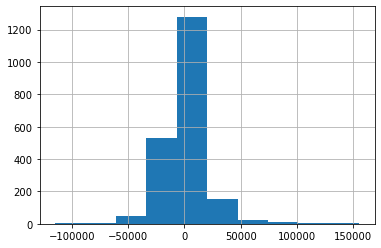

In [96]:
residuals_en.hist()

In [97]:
residuals_en.describe()

count      2051.000000
mean       1050.605348
std       18971.576903
min     -115336.473837
25%       -8294.611319
50%         202.592594
75%        9085.388239
max      155640.072090
dtype: float64

In [98]:
residuals_en.agg([pd.Series.skew, pd.Series.kurtosis])

skew    1.170186
kurt    9.429565
dtype: float64

In [99]:
preds.describe()

count      2051.000000
mean     180419.096261
std       75433.745934
min       32360.320451
25%      128758.880964
50%      162630.624736
75%      214331.464848
max      553568.638754
dtype: float64

In [101]:
residuals_en.to_csv('datasets/enet_residuals.csv')

#### Average elastic net and ridge

In [72]:
preds_ridge[:5]

array([122157.09836173, 160764.66027174, 210381.52822133, 105986.06346531,
       177637.92082855])

In [74]:
preds_enet[:5]

array([147207.50922544, 155963.47319991, 210759.35766429, 109136.69487063,
       181652.04510925])

In [90]:
preds_avg = (preds_ridge + preds_enet)/2

In [91]:
pd.DataFrame(preds_avg, index = X_test.index, columns = ['SalePrice']).to_csv('submission/ridge_enet_avg.csv')